In [5]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#### 통합 데이터 불러오기

In [2]:
df = pd.read_csv('../data_2/merge_data.csv') 
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
df

,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,6개월내출산,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,TARGET1
0,46,644.64,3.34,3.23,131.4,158.9,NaN,NaN,NaN,NaN,N,4.16,-1.05,0.18,6,4,농가소,0
1,46,633.93,4.59,4.52,129.7,148.4,NaN,NaN,NaN,NaN,Y,4.16,-1.05,0.17,4,3,농가소,0
2,32,567.86,5.50,4.89,130.3,158.0,NaN,NaN,NaN,NaN,N,5.58,0.53,0.42,7,5,농가소,1
3,33,564.29,6.13,5.56,130.7,155.9,NaN,NaN,NaN,NaN,Y,3.78,-0.91,0.42,2,2,농가소,0
4,48,692.86,4.79,4.61,131.2,146.1,NaN,NaN,NaN,NaN,Y,3.90,-1.35,0.82,4,3,농가소,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99850,30,668.00,4.18,4.06,137.6,161.4,NaN,NaN,NaN,NaN,Y,5.67,1.57,-0.01,2,2,우시장소,0
99851,30,606.00,5.43,4.38,133.7,156.4,NaN,NaN,NaN,NaN,N,5.14,0.65,0.07,3,2,우시장소,0
99852,30,576.00,3.99,3.65,130.6,148.7,NaN,NaN,NaN,NaN,N,NaN,NaN,0.01,4,3,우시장소,0
99853,30,657.00,4.33,4.69,132.3,154.3,NaN,NaN,NaN,NaN,N,5.00,1.40,0.02,4,3,우시장소,0


In [3]:
df_copy = df.copy()
print(df_copy.shape)
df_copy.head(1)

(99855, 18)


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,6개월내출산,농가근내평균,농가근내평균가산,근내EPD,근내,점수,농가구분,TARGET1
0,46,644.64,3.34,3.23,131.4,158.9,NaN,NaN,NaN,NaN,N,4.16,-1.05,0.18,6,4,농가소,0


#### 체고, 체장 데이터 결측 행 정리

##### 체고 또는 체장에서 0인 행을 제거하면 100이 넘는 값을 가짐을 확인
- 2개 변수 중 하나만 0인 행을 제거해줘도 상관없음

In [4]:
df_copy.describe()

,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,농가근내평균,농가근내평균가산,근내EPD,근내,점수,TARGET1
count,99855.000000,99855.000000,99855.000000,99855.000000,99855.000000,99855.000000,28273.000000,28273.000000,28273.000000,28273.000000,76314.000000,76314.000000,99855.000000,99855.000000,99855.000000,99855.000000
mean,43.046868,662.063025,4.692103,4.685088,131.392027,152.379607,3.121494,419.745952,5.365882,-0.060667,4.883464,-0.101457,0.270800,4.643954,3.153543,0.150438
std,9.359659,95.655930,0.676127,1.048276,2.709539,5.130414,1.533599,47.927495,1.432783,1.261777,1.270682,1.045885,0.228365,2.069066,1.136779,0.357502
min,30.000000,151.790000,1.900000,0.500000,0.000000,0.000000,2.000000,145.500000,0.000000,-5.310000,0.000000,-6.010000,-0.620000,0.000000,0.000000,0.000000
25%,34.000000,603.000000,4.250000,4.010000,129.700000,148.500000,2.000000,388.800000,4.500000,-0.910000,4.140000,-0.640000,0.110000,3.000000,2.000000,0.000000
50%,42.000000,662.500000,4.680000,4.720000,131.400000,153.200000,3.000000,419.500000,5.400000,-0.070000,4.990000,-0.070000,0.260000,4.000000,3.000000,0.000000
75%,51.000000,723.210000,5.160000,5.390000,133.400000,156.400000,4.000000,450.670000,6.330000,0.790000,5.670000,0.480000,0.410000,6.000000,4.000000,0.000000
max,60.000000,1241.070000,8.600000,9.000000,138.800000,163.900000,14.000000,621.000000,9.000000,4.840000,9.000000,5.000000,1.280000,9.000000,5.000000,1.000000


c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\cow\Finaaaaaal\cow\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\jun99\OneDrive - 계명대학교\바탕 화면\Project\cow\Finaaaaaal\cow\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


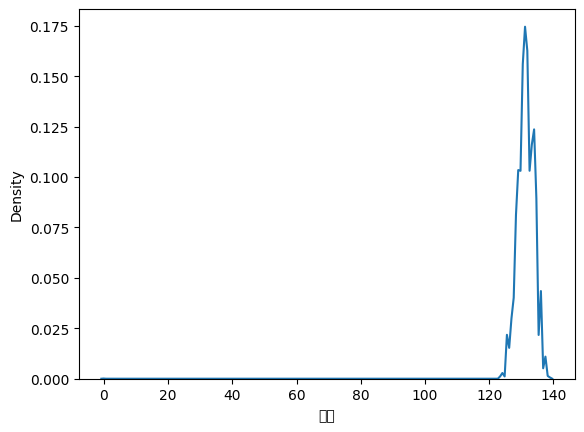

In [8]:
sns.kdeplot(df_copy['체고'])
plt.show()

In [27]:
print(df_copy['체고'].sort_values().unique()[:5])
print(df_copy['체장'].sort_values().unique()[:5])
print(len(df_copy))

print(len(df_copy[df_copy['체고']==0]))
df_cow = df_copy[df_copy['체고']!=0].copy()
print(len(df_cow[df_cow['체고']==0]))
print(len(df_cow[df_cow['체장']==0]))
df_cow.describe()

[  0.  123.6 123.9 124.4 125.4]
[  0.  135.5 136.  137.1 138. ]
99855
7
0
0


,개월령,생시체중,근내평균,도체범위근내평균,체고,체장,형매도축수,형매도체평균,형매근내평균,형매근내평균가산,농가근내평균,농가근내평균가산,근내EPD,근내,점수,TARGET1
count,99848.000000,99848.000000,99848.000000,99848.000000,99848.000000,99848.000000,28271.000000,28271.000000,28271.000000,28271.000000,76307.000000,76307.000000,99848.000000,99848.000000,99848.000000,99848.000000
mean,43.047372,662.062083,4.692113,4.685122,131.401239,152.390290,3.121573,419.748322,5.365872,-0.060646,4.883346,-0.101625,0.270795,4.643969,3.153543,0.150449
std,9.359472,95.659105,0.676121,1.048292,2.476229,4.969409,1.533624,47.928292,1.432827,1.261818,1.270618,1.045685,0.228331,2.069090,1.136797,0.357512
min,30.000000,151.790000,1.900000,0.500000,123.600000,135.500000,2.000000,145.500000,0.000000,-5.310000,0.000000,-6.010000,-0.580000,0.000000,0.000000,0.000000
25%,34.000000,603.000000,4.250000,4.010000,129.700000,148.500000,2.000000,388.800000,4.500000,-0.910000,4.140000,-0.640000,0.110000,3.000000,2.000000,0.000000
50%,42.000000,662.500000,4.680000,4.720000,131.400000,153.200000,3.000000,419.500000,5.400000,-0.070000,4.990000,-0.070000,0.260000,4.000000,3.000000,0.000000
75%,51.000000,723.210000,5.160000,5.390000,133.400000,156.400000,4.000000,450.670000,6.330000,0.790000,5.670000,0.480000,0.410000,6.000000,4.000000,0.000000
max,60.000000,1241.070000,8.600000,9.000000,138.800000,163.900000,14.000000,621.000000,9.000000,4.840000,9.000000,5.000000,1.280000,9.000000,5.000000,1.000000


In [15]:
# df_cow.to_csv('../data_2/cow_체고0제거.csv', index=False)

##### 로지스틱 반복문

In [26]:
# 6개월내출산과 농가구분의 odds값이 같음
# 확인필요
print(df_cow['6개월내출산'].value_counts())
print(df_cow['농가구분'].value_counts())

6개월내출산
Y    56305
N    43543
Name: count, dtype: int64
농가구분
농가소     92308
우시장소     7540
Name: count, dtype: int64


In [4]:
print(len(df_copy.columns))
df_copy.columns

18


Index(['개월령', '생시체중', '근내평균', '도체범위근내평균', '체고', '체장', '형매도축수', '형매도체평균',
       '형매근내평균', '형매근내평균가산', '6개월내출산', '농가근내평균', '농가근내평균가산', '근내EPD', '근내',
       '점수', '농가구분', 'TARGET1'],
      dtype='object')

In [5]:
df_copy.describe(include='object')

,6개월내출산,농가구분
count,99855,99855
unique,2,2
top,Y,농가소
freq,56308,92315


##### train_test_split 7:3

In [39]:
from sklearn.model_selection import train_test_split

X = df_cow.drop(['TARGET1'],axis=1)
Y = df_cow.TARGET1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2023)

print(f'데이터 셋 70%:{df_cow.shape[0]*0.7}')
print(f'데이터 셋 30%:{df_cow.shape[0]*0.3}')

train = pd.concat([X_train,Y_train], axis=1)
test = pd.concat([X_test,Y_test], axis=1)

print(f'train set:{train.shape[0]}')
print(f'test set:{test.shape[0]}')

데이터 셋 70%:69893.59999999999
데이터 셋 30%:29954.399999999998
train set:69893
test set:29955


##### train data set, 결측치 처리 전 logistic 결과

In [40]:
for i in range(0,14):
    model = sm.Logit.from_formula('TARGET1 ~ train.iloc[:,i]', train).fit()
    print(f'독립변수 이름: {train.columns[i]}')
    print(model.summary())
    # 오즈비 계산(Confidence interval 포함)
    odds_ratios = pd.DataFrame(
        {
            "OR": model.params,
            "Lower CI": model.conf_int()[0],
            "Upper CI": model.conf_int()[1],
        }
    )
    odds_ratios = np.exp(odds_ratios)
    print(odds_ratios)
    print('============='*3,f'{i+1}번째 결과 끝','============='*3)
    print('\n')

Optimization terminated successfully.
         Current function value: 0.411528
         Iterations 6
독립변수 이름: 개월령
                           Logit Regression Results                           
Dep. Variable:                TARGET1   No. Observations:                69893
Model:                          Logit   Df Residuals:                    69891
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                 0.02473
Time:                        11:14:39   Log-Likelihood:                -28763.
converged:                       True   LL-Null:                       -29492.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1566      0.051      3.074      0.002       0.057       0.25

In [29]:
model = sm.Logit.from_formula('TARGET1 ~ C(train["6개월내출산"], Treatment("N"))', train).fit()
print(model.summary())
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.410081
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                TARGET1   No. Observations:                69893
Model:                          Logit   Df Residuals:                    69891
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                 0.02816
Time:                        11:07:57   Log-Likelihood:                -28662.
converged:                       True   LL-Null:                       -29492.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.3120

In [30]:
model = sm.Logit.from_formula('TARGET1 ~ C(농가구분, Treatment("우시장소"))', train).fit()
print(model.summary())
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                TARGET1   No. Observations:                69893
Model:                          Logit   Df Residuals:                    69891
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:               0.0001243
Time:                        11:08:02   Log-Likelihood:                -29489.
converged:                       True   LL-Null:                       -29492.
Covariance Type:            nonrobust   LLR p-value:                  0.006782
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.6399      0.037    -43

###### 결측치 채우고 난 후

In [42]:
df_fill = df_cow.copy()
df_fill = df_fill.fillna(0)
df_fill.isna().sum()

개월령         0
생시체중        0
근내평균        0
도체범위근내평균    0
체고          0
체장          0
형매도축수       0
형매도체평균      0
형매근내평균      0
형매근내평균가산    0
6개월내출산      0
농가근내평균      0
농가근내평균가산    0
근내EPD       0
근내          0
점수          0
농가구분        0
TARGET1     0
dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

X = df_fill.drop(['TARGET1'],axis=1)
Y = df_fill.TARGET1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 2023)

print(f'데이터 셋 70%:{df_fill.shape[0]*0.7}')
print(f'데이터 셋 30%:{df_fill.shape[0]*0.3}')

train = pd.concat([X_train,Y_train], axis=1)
test = pd.concat([X_test,Y_test], axis=1)

print(f'train set:{train.shape[0]}')
print(f'test set:{test.shape[0]}')

데이터 셋 70%:69893.59999999999
데이터 셋 30%:29954.399999999998
train set:69893
test set:29955


In [44]:
for i in range(0,14):
    model = sm.Logit.from_formula('TARGET1 ~ train.iloc[:,i]', train).fit()
    print(f'독립변수 이름: {train.columns[i]}')
    print(model.summary())
    # 오즈비 계산(Confidence interval 포함)
    odds_ratios = pd.DataFrame(
        {
            "OR": model.params,
            "Lower CI": model.conf_int()[0],
            "Upper CI": model.conf_int()[1],
        }
    )
    odds_ratios = np.exp(odds_ratios)
    print(odds_ratios)
    print('============='*3,f'{i+1}번째 결과 끝','============='*3)
    print('\n')

Optimization terminated successfully.
         Current function value: 0.411528
         Iterations 6
독립변수 이름: 개월령
                           Logit Regression Results                           
Dep. Variable:                TARGET1   No. Observations:                69893
Model:                          Logit   Df Residuals:                    69891
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                 0.02473
Time:                        11:27:35   Log-Likelihood:                -28763.
converged:                       True   LL-Null:                       -29492.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1566      0.051      3.074      0.002       0.057       0.25

In [45]:
model = sm.Logit.from_formula('TARGET1 ~ C(train["6개월내출산"], Treatment("N"))', train).fit()
print(model.summary())
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.410081
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                TARGET1   No. Observations:                69893
Model:                          Logit   Df Residuals:                    69891
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:                 0.02816
Time:                        11:29:23   Log-Likelihood:                -28662.
converged:                       True   LL-Null:                       -29492.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -1.3120

In [46]:
model = sm.Logit.from_formula('TARGET1 ~ C(농가구분, Treatment("우시장소"))', train).fit()
print(model.summary())
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.421913
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                TARGET1   No. Observations:                69893
Model:                          Logit   Df Residuals:                    69891
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Oct 2023   Pseudo R-squ.:               0.0001243
Time:                        11:29:29   Log-Likelihood:                -29489.
converged:                       True   LL-Null:                       -29492.
Covariance Type:            nonrobust   LLR p-value:                  0.006782
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.6399      0.037    -43